The purpose of this workbook is to look at where crimes were committed broken down by fbi description on a scatter plot. We do this by plotting the x and y coordinates



In [119]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/MATH_3439/'
graph_folder = '/content/drive/My Drive/Reducing Austin Crime/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv(drive_dir + 'data/2016_austin_crime.csv')

In [ ]:
df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,201611018.0,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN


#Cleaning Data


In [ ]:
df = df.drop(['GO Primary Key', 'GO Census Tract', 'GO Location'],1)


In [ ]:
df.columns = ['council_district', 'apd_desc', 'fbi_desc', 'report_date', 'clearance_status', 'clearance_date', 'district', 'location_zip', 'x', 'y']
df

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,district,location_zip,x,y
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,D,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,G,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,E,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,G,78701.0,3113643.0,10070357.0
4,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,C,10-Mar-16,E,78753.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,B,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,G,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,I,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,H,78742.0,3131778.0,10062481.0


In [ ]:
for col in df.columns:
  percent = 100 * df[col].isna().sum() / df.shape[0]
  percent = round(percent,2)
  print(f'{col}: {df[col].isna().sum()} ({percent}%) missing values')

council_district: 256 (0.68%) missing values
apd_desc: 0 (0.0%) missing values
fbi_desc: 0 (0.0%) missing values
report_date: 0 (0.0%) missing values
clearance_status: 1719 (4.59%) missing values
clearance_date: 1719 (4.59%) missing values
district: 0 (0.0%) missing values
location_zip: 167 (0.45%) missing values
x: 867 (2.31%) missing values
y: 867 (2.31%) missing values


In [ ]:
df = df.dropna()

In [ ]:
#Check that all rows with missing values were dropped
for col in df.columns:
  percent = 100 * df[col].isna().sum() / df.shape[0]
  percent = round(percent,2)
  print(f'{col}: {df[col].isna().sum()} ({percent}%) missing values')

council_district: 0 (0.0%) missing values
apd_desc: 0 (0.0%) missing values
fbi_desc: 0 (0.0%) missing values
report_date: 0 (0.0%) missing values
clearance_status: 0 (0.0%) missing values
clearance_date: 0 (0.0%) missing values
district: 0 (0.0%) missing values
location_zip: 0 (0.0%) missing values
x: 0 (0.0%) missing values
y: 0 (0.0%) missing values


In [ ]:
#We dropped 5% of the clearance status and 2 percent of x,y coordinates, which is not too bad
df

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,district,location_zip,x,y
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,D,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,G,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,E,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,G,78701.0,3113643.0,10070357.0
5,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,N,8-Jan-16,C,78724.0,3146947.0,10077985.0
...,...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,B,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,G,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,I,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,H,78742.0,3131778.0,10062481.0


In [ ]:
df['apd_desc'] = df['apd_desc'].str.strip()
df['fbi_desc'] = df['fbi_desc'].str.strip()
df['clearance_status'] = df['clearance_status'].str.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#88 might be a typo for district
df['district'].value_counts()

D     5040
E     4403
B     4159
F     4154
I     4065
H     3955
A     3790
C     2646
G     2518
AP     154
88       1
Name: district, dtype: int64

In [ ]:
df.dtypes

council_district    float64
apd_desc             object
fbi_desc             object
report_date          object
clearance_status     object
clearance_date       object
district             object
location_zip        float64
x                   float64
y                   float64
dtype: object

In [ ]:
df['council_district'] = df['council_district'].astype(int)
df['location_zip'] = df['location_zip'].astype(int)
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

council_district     int64
apd_desc            object
fbi_desc            object
report_date         object
clearance_status    object
clearance_date      object
district            object
location_zip         int64
x                    int64
y                    int64
dtype: object

#Investigating X Y coordinates
- looking at where crimes occured via scatter plot



In [ ]:
df['x'].value_counts()

3129996    415
3094135    319
3120958    257
3121345    211
3092523    207
          ... 
3108607      1
3116771      1
3092183      1
3141327      1
3133078      1
Name: x, Length: 13524, dtype: int64

In [ ]:
df['fbi_desc'].value_counts()

Theft          24845
Burglary        5025
Agg Assault     2086
Auto Theft      1988
Robbery          911
Murder            30
Name: fbi_desc, dtype: int64

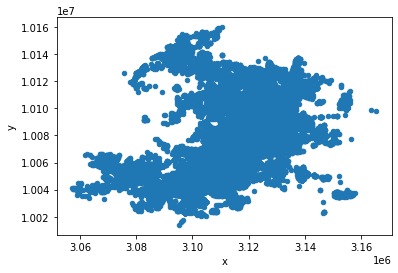

In [ ]:
df.plot(kind='scatter', x='x', y='y')

#Breakdown of FBI Desc by X and Y
- looking at fbi_desc by plotting x and y coordinates


In [ ]:
df['fbi_desc'].unique()

In [ ]:
df['fbi_desc'] = df['fbi_desc'].replace(['Auto Theft'], 'Theft')

#Creating df with x and y coordinates of landmarks in austin

In [ ]:
landmark = [["St. Edward's University", 3109333, 10057050], ['University Estates', 3123922, 10059982], ['UT', 3116363, 10080075], ['Green Belt', 3136332, 10080678], ['The Domain', 3118375, 10119487], ['Zilker Park', 3106806, 10070918], ['Mckinney Falls', 3120661, 10040307]]

In [ ]:
landmark_df = pd.DataFrame(landmark, columns = ['landmark', 'x', 'y'])

In [ ]:
#tried making a program for this, but kept making separate graph
def landmark_plot():
  ax1 = landmark_df[landmark_df['landmark'] == "St. Edward's University"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'purple', label = "St. Edward's University")
  ax2 = landmark_df[landmark_df['landmark'] == "University Estates"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'black', label = "University Estates", ax = ax1)
  ax3 = landmark_df[landmark_df['landmark'] == "Green Belt"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'yellow', label = "Green Belt", ax = ax1)
  ax4 = landmark_df[landmark_df['landmark'] == "UT"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'orange', label = "UT", ax = ax1)
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


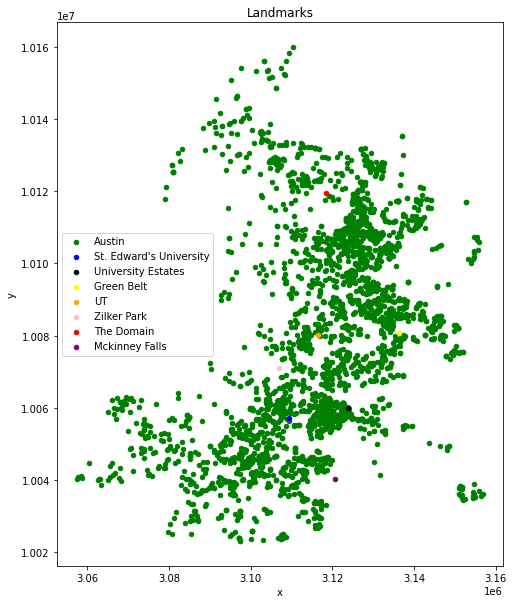

In [122]:
ax1 = ax1 = df[df['apd_desc'] == 'BURGLARY OF RESIDENCE'].plot(x='x',y='y',kind='scatter', color = 'g', label = 'Austin', title = 'Landmarks', figsize = [8,10])
ax2 = landmark_df[landmark_df['landmark'] == "St. Edward's University"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'blue', label = "St. Edward's University", ax = ax1)
ax3 = landmark_df[landmark_df['landmark'] == "University Estates"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'black', label = "University Estates", ax = ax1)
ax4 = landmark_df[landmark_df['landmark'] == "Green Belt"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'yellow', label = "Green Belt", ax = ax1)
ax5 = landmark_df[landmark_df['landmark'] == "UT"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'orange', label = "UT", ax = ax1)
ax6 = landmark_df[landmark_df['landmark'] == "Zilker Park"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'pink', label = "Zilker Park", ax = ax1)
ax7 = landmark_df[landmark_df['landmark'] == "The Domain"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'red', label = "The Domain", ax = ax1)
ax8 = landmark_df[landmark_df['landmark'] == "Mckinney Falls"].plot(x = 'x', y = 'y', kind = 'scatter', color = 'purple', label = "Mckinney Falls", ax = ax1)

plt.savefig(graph_folder + 'graphs/landmarks_scatter.eps', format = 'eps')

## Agg Assault

In [ ]:
df.head()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

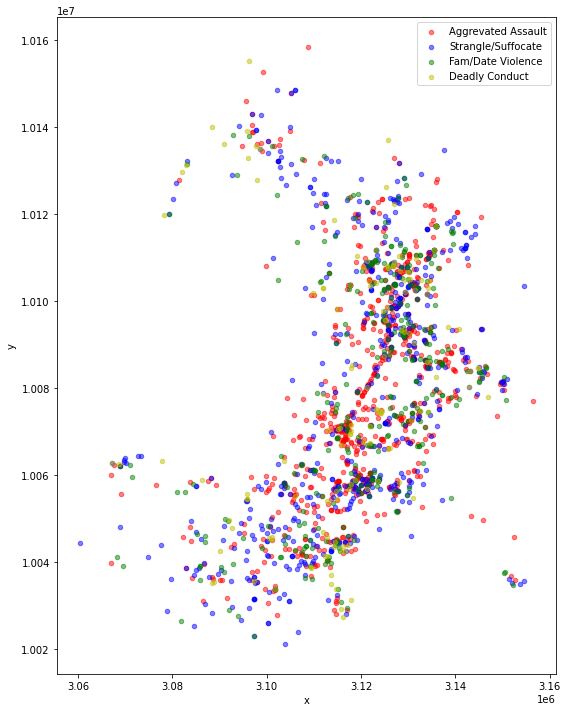

In [124]:
ax1 = df[df['apd_desc'] == 'AGG ASSAULT'].plot.scatter(x='x',y='y', color = 'r', label = 'Aggrevated Assault', alpha = .5, figsize = [8,10])
ax2 = df[df['apd_desc'] == 'AGG ASLT STRANGLE/SUFFOCATE'].plot.scatter(x='x',y='y', color = 'b', ax=ax1, label = 'Strangle/Suffocate', alpha = .5)
ax3 = df[df['apd_desc'] == 'AGG ASSAULT FAM/DATE VIOLENCE'].plot.scatter(x='x',y='y', color = 'g', ax=ax1, label = 'Fam/Date Violence', alpha = .5)
ax4 = df[df['apd_desc'] == 'DEADLY CONDUCT'].plot.scatter(x='x',y='y', color = 'y', ax=ax1, label = 'Deadly Conduct', alpha = .5)

plt.tight_layout()
plt.savefig(graph_folder + 'graphs/assault_scatter.eps', format = 'eps')


## Theft

In [137]:
df['apd_desc'] = df['apd_desc'].replace(['BURGLARY OF VEHICLE', 'THEFT FROM AUTO', 'THEFT OF LICENSE PLATE', 'THEFT OF AUTO PARTS'], 'AUTO THEFT')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

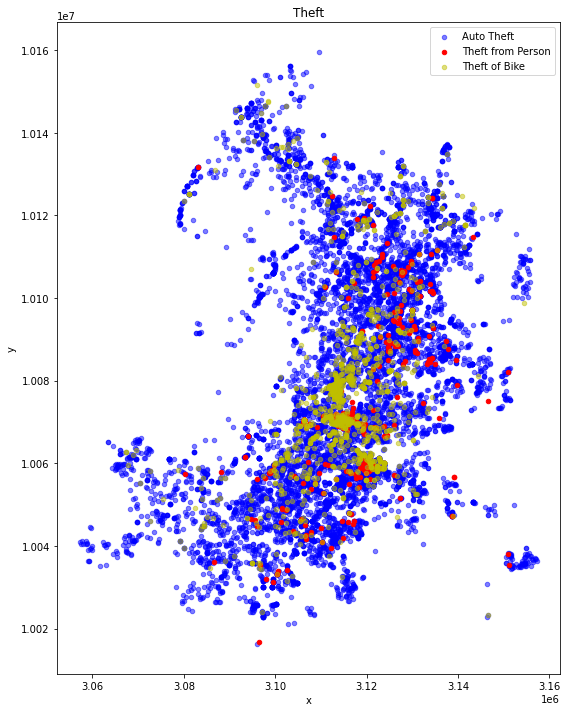

In [138]:
ax1 = df[df['apd_desc'] == 'AUTO THEFT'].plot(x='x',y='y',kind='scatter', color = 'b', label = 'Auto Theft', title = 'Theft', alpha = .5, figsize = [8,10])
ax2 = df[df['apd_desc'] == 'THEFT FROM PERSON'].plot(x='x',y='y',kind='scatter', color = 'r', ax=ax1, label = 'Theft from Person')
ax3 = df[df['apd_desc'] == 'THEFT OF BICYCLE'].plot(x='x',y='y',kind='scatter', color = 'y', ax=ax1, label = 'Theft of Bike', alpha = .5)
plt.tight_layout()
plt.savefig(graph_folder + 'graphs/theft_scatter.eps', format = 'eps')


##Robbery

In [131]:
df['apd_desc'] = df['apd_desc'].replace(['AGG ROBBERY BY ASSAULT'], 'ROBBERY BY ASSAULT')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

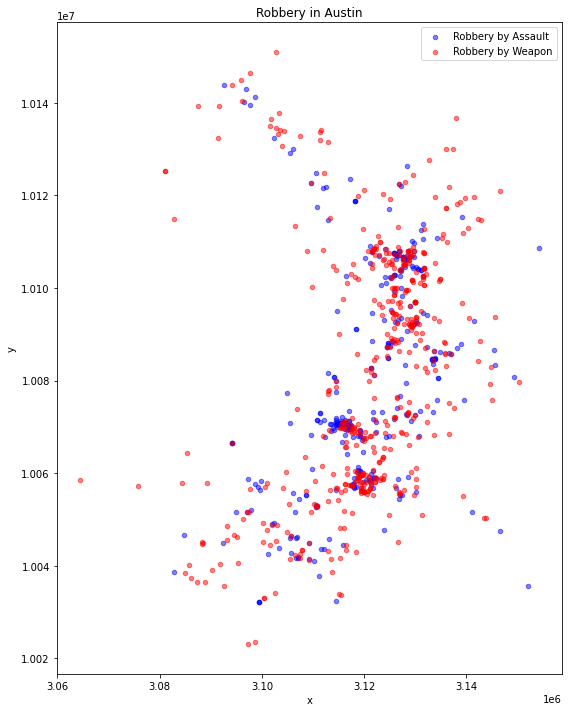

In [132]:
ax1 = df[df['apd_desc'] == 'ROBBERY BY ASSAULT'].plot(x='x',y='y',kind='scatter', color = 'b', label = 'Robbery by Assault', title = 'Robbery in Austin', alpha = .5, figsize = [8,10])
ax2 = df[df['apd_desc'] == 'AGG ROBBERY/DEADLY WEAPON'].plot(x='x',y='y',kind='scatter', color = 'r', label = 'Robbery by Weapon', ax = ax1, alpha = .5)
plt.tight_layout()
plt.savefig(graph_folder + 'graphs/robbery_scatter.eps', format = 'eps')

##Burglary

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


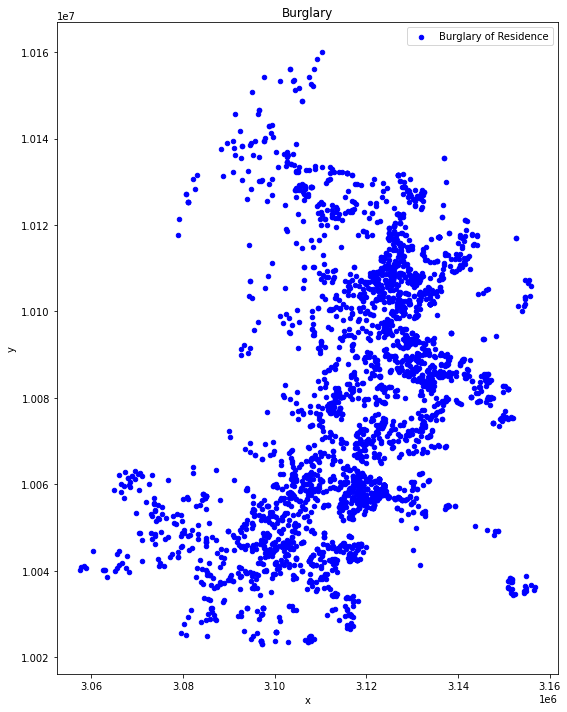

In [139]:
ax1 = df[df['apd_desc'] == 'BURGLARY OF RESIDENCE'].plot(x='x',y='y',kind='scatter', color = 'b', label = 'Burglary of Residence', title = 'Burglary', figsize = [8,10])
plt.tight_layout()
plt.savefig(graph_folder + 'graphs/burglary_scatter.eps', format = 'eps')

###Murder

In [135]:
df['apd_desc'] = df['apd_desc'].replace(['MANSLAUGHTER', 'CAPITAL MURDER'], 'MURDER')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


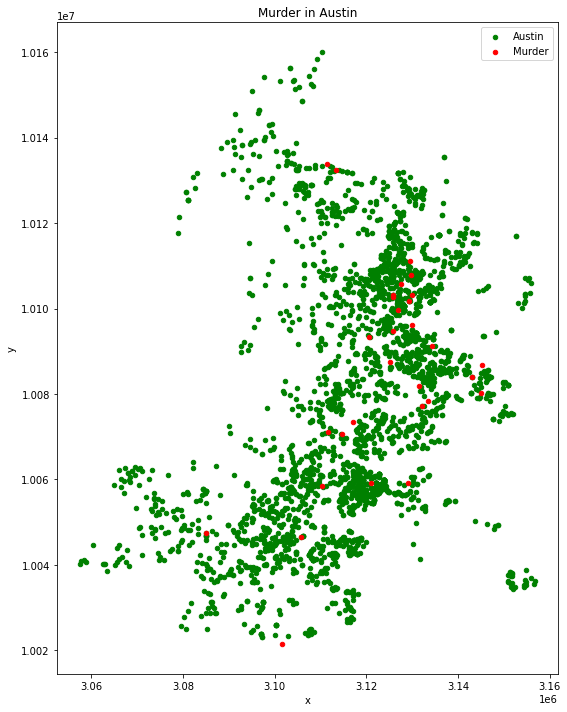

In [136]:
ax1 = df[df['apd_desc'] == 'BURGLARY OF RESIDENCE'].plot(x='x',y='y',kind='scatter', color = 'g', label = 'Austin', title = 'Murder', figsize = [8,10])
ax2 = df[df['apd_desc'] == 'MURDER'].plot(x='x',y='y',kind='scatter', color = 'r', label = 'Murder', title = 'Murder in Austin', ax=ax1)
plt.tight_layout()
plt.savefig(graph_folder + 'graphs/murder_scatter.eps', format = 'eps')